<a href="https://colab.research.google.com/github/maacunap76/Especiaizacion_ML_Deep_DMC/blob/main/Supervised_models/Logistic_regression/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


In [82]:
import pandas as pd
import seaborn as  sns
import numpy as np

In [83]:
pddf = pd.read_csv('/Train_Dataset.csv')
pddf.head()

<ipython-input-83-c4be0d628733>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pddf = pd.read_csv('/Train_Dataset.csv')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [84]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [85]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization',
                        'Car_Owned',
                        'Bike_Owned',
                        'Active_Loan',
                        'House_Own',
                        'Mobile_Tag',
                        'Homephone_Tag','Workphone_Working']

numerical_features = list(set(pddf.columns.tolist()) - set(categorical_features +['ID_DaYs','ID','Default']))

In [86]:
# convert Series
for col in numerical_features:
  pddf[col] = pd.to_numeric(pddf[col])

<Axes: xlabel='Default', ylabel='count'>

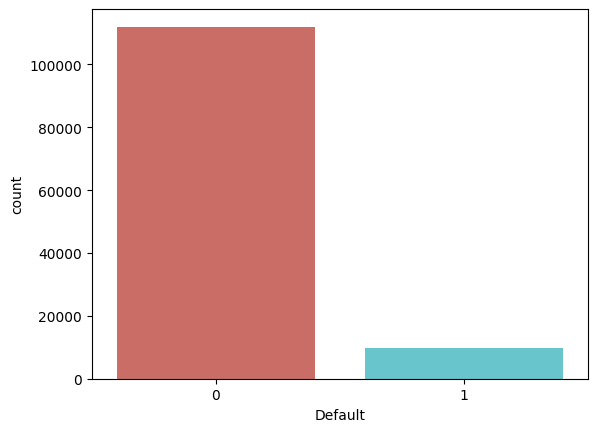

In [87]:
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [88]:
pddf.Default.mean()

0.0807920824579832

In [89]:
pddf.groupby('House_Own').agg({'Default': 'mean'})

,Default
House_Own,
0.0,0.081051
1.0,0.080454


In [90]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf, 
                               stratify = pddf['Default'],#se estratifica
                               train_size = 0.7, 
                               random_state = 123)

In [91]:
#Analisis Univariado

In [92]:
univariate = pddf[numerical_features].describe(percentiles = [0.05,0.95]).transpose()
univariate.reset_index(drop =False, inplace= True)
univariate['missing_rate'] = 1 - univariate['count']/len(train)
univariate.rename(columns = {'index' : 'feature','5%':'p5','50%':'median','95%':'p95'}, inplace = True)
univariate

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Population_Region_Relative,116988.0,0.022602,0.413617,0.000533,0.004960,0.018850,0.046220,1.000000e+02,-0.371505
1,Registration_Days,118225.0,4975.162123,3514.546963,0.000000,332.000000,4493.000000,11383.800000,2.373800e+04,-0.386007
2,Score_Source_3,94934.0,0.511180,0.194333,0.000527,0.154744,0.537070,0.786267,8.960095e-01,-0.112956
3,Own_House_Age,41761.0,12.157324,12.056079,0.000000,1.000000,9.000000,30.000000,6.900000e+01,0.510416
4,Phone_Change,118192.0,962.106056,827.976726,0.000000,0.000000,755.000000,2522.000000,4.185000e+03,-0.385620
5,Child_Count,118218.0,0.417779,0.728802,0.000000,0.000000,0.000000,2.000000,1.900000e+01,-0.385925
6,Loan_Annuity,117030.0,2721.254492,1461.466162,217.350000,900.000000,2499.750000,5345.550000,2.250000e+04,-0.371997
7,Credit_Bureau,103316.0,1.891082,1.861921,0.000000,0.000000,1.000000,6.000000,2.200000e+01,-0.211222
8,Age_Days,118239.0,16027.422948,4366.356504,7676.000000,9406.000000,15734.000000,23209.000000,2.520100e+04,-0.386171
9,Score_Source_2,116170.0,0.518625,0.740248,0.000005,0.132090,0.564978,0.748030,1.000000e+02,-0.361915


In [93]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

In [94]:
train

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Income_tric,Credit_Amount_tric,Client_Family_Members_tric,Employed_Days_tric,Application_Process_Day_tric,ID_Days_tric,Application_Process_Hour_tric,Cleint_City_Rating_tric,Score_Source_1_tric,Social_Circle_Default_tric
66289,12199917,14400.0,0.0,1.0,1.0,1.0,0.0,180000.00,6269.85,Alone,...,14400.0,135000.00,2.0,1121.0,1.0,4914.0,12.0,2.0,NaN,NaN
109009,12104744,6750.0,0.0,1.0,1.0,0.0,1.0,15282.00,1524.15,Relative,...,6750.0,15282.00,3.0,3750.0,5.0,368.0,17.0,2.0,0.464453,0.1191
30526,12149301,NaN,0.0,1.0,0.0,1.0,1.0,49752.00,3930.75,Alone,...,NaN,49752.00,3.0,3579.0,4.0,3653.0,15.0,2.0,0.572723,0.0381
117872,12131116,11250.0,1.0,0.0,1.0,1.0,0.0,112500.00,3302.55,Alone,...,11250.0,112500.00,2.0,1336.0,4.0,862.0,12.0,2.0,NaN,NaN
90866,12210770,10800.0,0.0,0.0,1.0,0.0,0.0,122790.15,5215.50,Alone,...,10800.0,122790.15,2.0,229.0,0.0,4386.0,11.0,2.0,NaN,0.0247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,12186869,7200.0,0.0,0.0,NaN,1.0,3.0,67500.00,2424.60,Alone,...,7200.0,67500.00,4.0,422.0,2.0,4092.0,13.0,2.0,NaN,0.0773
9256,12195496,27000.0,1.0,0.0,1.0,1.0,2.0,16681.05,1809.45,Alone,...,27000.0,16681.05,4.0,363.0,1.0,368.0,7.0,2.0,0.262241,NaN
8612,12186343,NaN,0.0,0.0,0.0,1.0,0.0,78192.00,3457.35,Kids,...,NaN,78192.00,1.0,365243.0,5.0,4808.0,16.0,2.0,0.690784,NaN
4291,12100317,9000.0,0.0,0.0,0.0,1.0,0.0,120120.75,3181.50,Alone,...,9000.0,120120.75,2.0,365243.0,2.0,4779.0,9.0,2.0,NaN,0.3258


<Axes: >

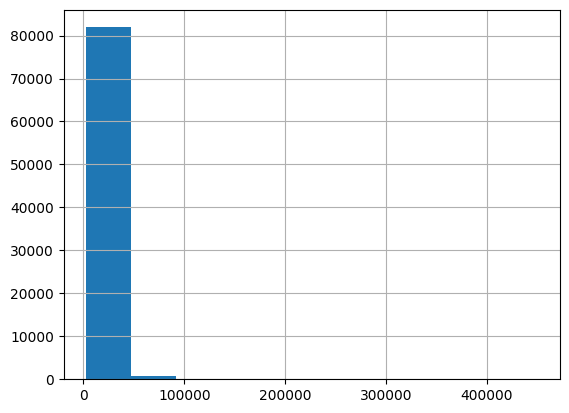

In [95]:
train.Client_Income.hist()

<Axes: >

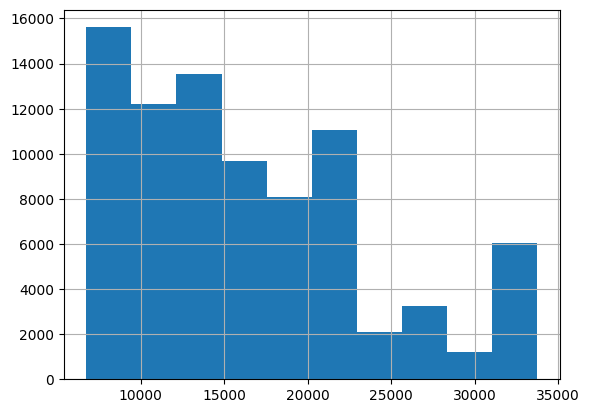

In [96]:
train.Client_Income_tric.hist()

In [110]:
# Discretizar variables, esto es para variables numericas
from sklearn.preprocessing import KBinsDiscretizer

temp = train.copy()
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp['Client_Income_tric']).reshape(-1, 1))

<ipython-input-110-c33be7896251>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


In [111]:
discretizer.transform(np.array(temp['Client_Income_tric']).reshape(-1, 1))

array([[2.],
       [0.],
       [3.],
       ...,
       [3.],
       [0.],
       [0.]])

In [114]:
temp['Client_Income_rango'] = discretizer.transform(np.array(temp['Client_Income_tric']).reshape(-1, 1))


In [115]:
temp

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Credit_Amount_tric,Client_Family_Members_tric,Employed_Days_tric,Application_Process_Day_tric,ID_Days_tric,Application_Process_Hour_tric,Cleint_City_Rating_tric,Score_Source_1_tric,Social_Circle_Default_tric,Client_Income_rango
66289,12199917,14400.000000,0.0,1.0,1.000000,1.0,0.0,180000.00,6269.85,Alone,...,135000.00,2.0,1121.000000,1.0,4914.0,12.0,2.0,0.500761,0.110655,2.0
109009,12104744,6750.000000,0.0,1.0,1.000000,0.0,1.0,15282.00,1524.15,Relative,...,15282.00,3.0,3750.000000,5.0,368.0,17.0,2.0,0.464453,0.119100,0.0
30526,12149301,16853.821827,0.0,1.0,0.000000,1.0,1.0,49752.00,3930.75,Alone,...,49752.00,3.0,3579.000000,4.0,3653.0,15.0,2.0,0.572723,0.038100,3.0
117872,12131116,11250.000000,1.0,0.0,1.000000,1.0,0.0,112500.00,3302.55,Alone,...,112500.00,2.0,1336.000000,4.0,862.0,12.0,2.0,0.500761,0.110655,1.0
90866,12210770,10800.000000,0.0,0.0,1.000000,0.0,0.0,122790.15,5215.50,Alone,...,122790.15,2.0,229.000000,0.0,4386.0,11.0,2.0,0.500761,0.024700,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,12186869,7200.000000,0.0,0.0,0.497536,1.0,3.0,67500.00,2424.60,Alone,...,67500.00,4.0,422.000000,2.0,4092.0,13.0,2.0,0.500761,0.077300,0.0
9256,12195496,27000.000000,1.0,0.0,1.000000,1.0,2.0,16681.05,1809.45,Alone,...,16681.05,4.0,363.000000,1.0,368.0,7.0,2.0,0.262241,0.110655,7.0
8612,12186343,16853.821827,0.0,0.0,0.000000,1.0,0.0,78192.00,3457.35,Kids,...,78192.00,1.0,365243.000000,5.0,4808.0,16.0,2.0,0.690784,0.110655,3.0
4291,12100317,9000.000000,0.0,0.0,0.000000,1.0,0.0,120120.75,3181.50,Alone,...,120120.75,2.0,365243.000000,2.0,4779.0,9.0,2.0,0.500761,0.325800,0.0


In [116]:
temp.groupby('Client_Income_rango').agg({'Default': 'mean'}).reset_index()

,Client_Income_rango,Default
0,0.0,0.081807
1,1.0,0.086715
2,2.0,0.087662
3,3.0,0.084322
4,4.0,0.082114
5,5.0,0.078142
6,6.0,0.069065
7,7.0,0.064387
8,8.0,0.068909
9,9.0,0.061857


<Axes: xlabel='Client_Income_rango', ylabel='Default'>

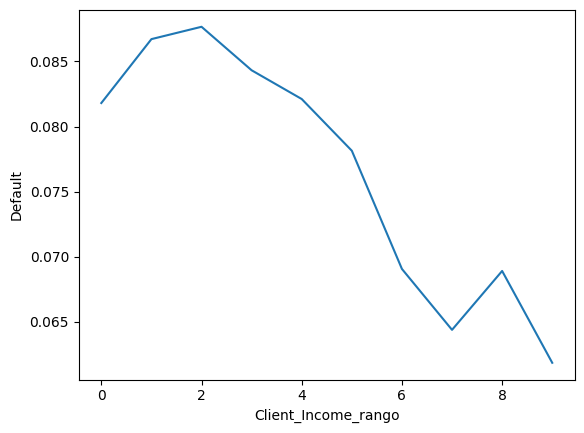

In [117]:
#interpretacion del ratio de evento por tramo de variable numerica
sns.lineplot(data = temp.groupby('Client_Income_rango').agg({'Default': 'mean'}).reset_index(),
             x = 'Client_Income_rango',
             y = 'Default')

In [119]:
#tratamiento de missings
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-119-be7eb047d8eb>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-119-be7eb047d8eb>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


In [ ]:
#Preseleccion de Variables

In [120]:
from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': numerical_features,
                       'gini': [roc_auc_score(train.Default, train[col])*2-1 for col in numerical_features]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
9,Score_Source_2,-0.295250,0.295250
2,Score_Source_3,-0.281581,0.281581
13,Employed_Days,-0.181642,0.181642
8,Age_Days,-0.153077,0.153077
18,Score_Source_1,-0.152179,0.152179
15,ID_Days,-0.118824,0.118824
4,Phone_Change,-0.114764,0.114764
17,Cleint_City_Rating,0.092428,0.092428
1,Registration_Days,-0.074154,0.074154
0,Population_Region_Relative,-0.064022,0.064022
